# 1. Подготовка данных

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
from numpy.random import RandomState
state = RandomState(12345) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Настройка отображения датафреймов
pd.set_option('display.max_columns', 500)

In [3]:
# выгрузим все наши датасеты и посмотрим на их размерность
full = pd.read_csv('datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
train = pd.read_csv('datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)

full.shape, train.shape, test.shape

((22716, 86), (16860, 86), (5856, 52))

In [4]:
# Сохраним имена наших датасетов
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
full.name = get_df_name(full)
train.name = get_df_name(train)
test.name = get_df_name(test)

In [6]:
def examine_df(df:pd.DataFrame):
    """ 
    На вход получает датафрейм df - pd.DataFrame

    Выводит на экран основную информацию о датафрейме, количество пропусков и количество дубликатов
    """
    print(f'Данные {df.name}')
    display(df.head(10))
    display(df.info())
    display(df.describe())
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.style.format('{:.1f}', subset='Percent')
    
    print(f'Количество пропусков {missing_data}')    
    print(f'Количество дубликатов : {df.duplicated().sum()}')
    print('************')

In [7]:
# Посмотрим основную информацию о наших данных
display(examine_df(full))    
display(examine_df(train))
display(examine_df(test))


Данные full


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

Количество пропусков                                                     Total    Percent
rougher.output.recovery                              3119  13.730410
rougher.output.tail_ag                               2737  12.048776
rougher.output.tail_sol                              2736  12.044374
rougher.output.tail_au                               2736  12.044374
rougher.input.floatbank11_xanthate                   2257   9.935728
...                                                   ...        ...
rougher.calculation.floatbank10_sulfate_to_au_feed     44   0.193696
primary_cleaner.state.floatbank8_b_level               43   0.189294
primary_cleaner.state.floatbank8_c_level               43   0.189294
primary_cleaner.state.floatbank8_d_level               43   0.189294
primary_cleaner.input.feed_size                         0   0.000000

[86 rows x 2 columns]
Количество дубликатов : 22
************


None

Данные train


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

Количество пропусков                                                     Total    Percent
rougher.output.recovery                              2573  15.260973
rougher.output.tail_ag                               2250  13.345196
rougher.output.tail_sol                              2249  13.339265
rougher.output.tail_au                               2249  13.339265
secondary_cleaner.output.tail_sol                    1986  11.779359
...                                                   ...        ...
primary_cleaner.state.floatbank8_c_level               27   0.160142
primary_cleaner.state.floatbank8_d_level               27   0.160142
rougher.calculation.sulfate_to_au_concentrate          27   0.160142
rougher.calculation.floatbank10_sulfate_to_au_feed     27   0.160142
primary_cleaner.input.feed_size                         0   0.000000

[86 rows x 2 columns]
Количество дубликатов : 16
************


None

Данные test


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

Количество пропусков                                             Total   Percent
rougher.input.floatbank11_xanthate            353  6.028005
primary_cleaner.input.sulfate                 302  5.157104
primary_cleaner.input.depressant              284  4.849727
rougher.input.floatbank10_sulfate             257  4.388661
primary_cleaner.input.xanthate                166  2.834699
rougher.input.floatbank10_xanthate            123  2.100410
rougher.input.feed_sol                         67  1.144126
rougher.input.floatbank11_sulfate              55  0.939208
rougher.input.feed_rate                        40  0.683060
secondary_cleaner.state.floatbank3_a_air       34  0.580601
secondary_cleaner.state.floatbank2_b_air       23  0.392760
rougher.input.feed_size                        22  0.375683
secondary_cleaner.state.floatbank2_a_air       20  0.341530
rougher.state.floatbank10_f_air                17  0.290301
rougher.state.floatbank10_e_air                17  0.290301
rougher.state.float

None

Благодаря первому взгляду на наши данные, мы уже можем заметить пропуски и дубликаты в основном наборе данных, обучающей и тестовой выборках.

В первую очередь избавимся от дубликатов в обучающей и тестовой выборках.

In [8]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

Так же избавимся от данных с пропусками в столбцах с результатами. Они явно не помогут при обучении модели.

In [9]:
output_columns = train.columns[train.columns.str.contains('final.output', na=False) | train.columns.str.contains('rougher.output', na=False)]
train.dropna(subset=list(output_columns), inplace = True)

Убедимся, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

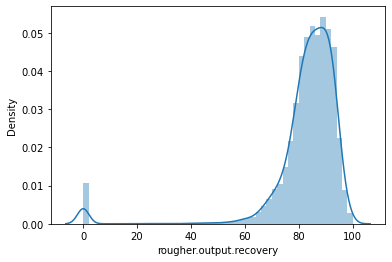

In [10]:
# Распределение эффективности обогащения на обучающей выборке
sns.distplot(train['rougher.output.recovery'])
plt.show()

In [11]:
# Найдем значение MAE
output_calculated = train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au']) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100

display(mean_absolute_error(train['rougher.output.recovery'], output_calculated))

9.351954683496141e-15

MAE между значениями rougher.output.recovery и рассчетами стремится к нулю. Можем сделать вывод что этот признак был правильно рассчитан (в обучающей выборке).

Проанализием признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [12]:
display(train.columns.difference(test.columns))

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке что-то не видно признаков с результатами. Видимо появятся попозже...

Мы знаем, что "Соседние по времени параметры часто похожи", поэтому можем заменить пропуски в датасетах методом forward fill.

In [13]:
train.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# 2. Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

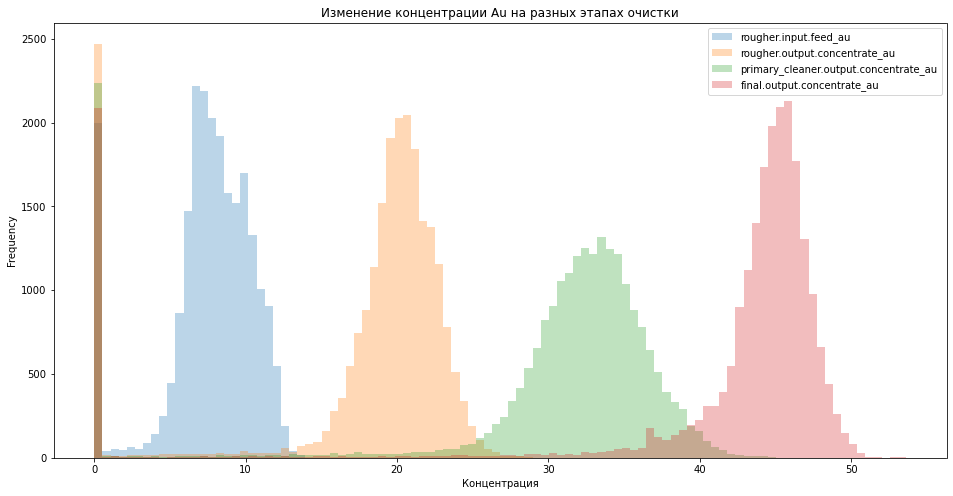

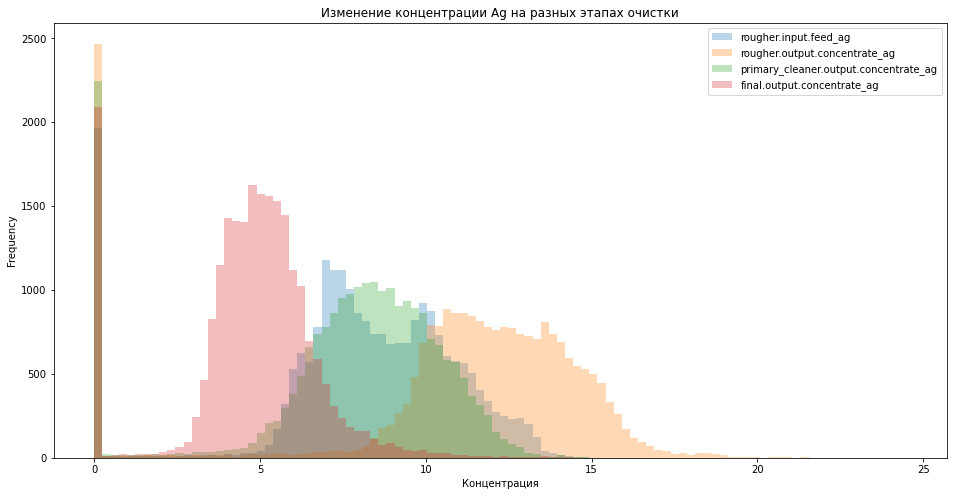

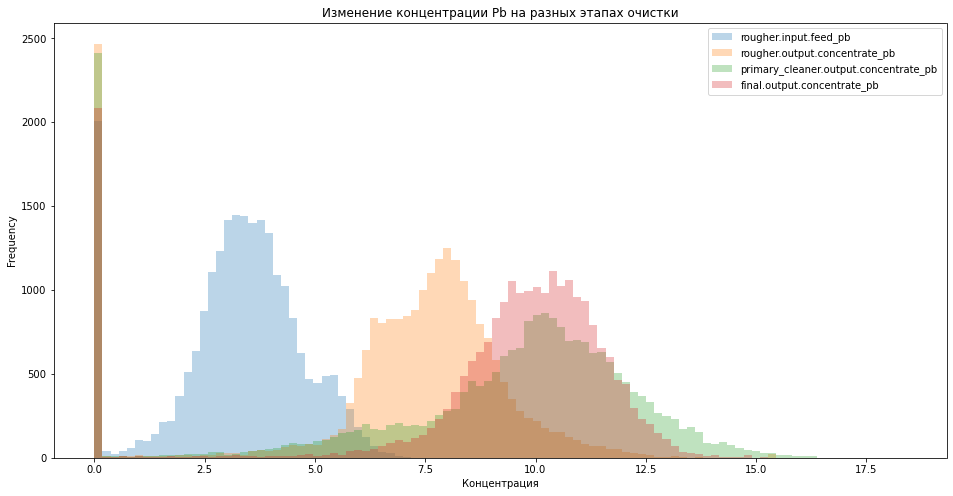

In [14]:
# Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
ag_list = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
au_list = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']
pb_list = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']

metall_dict = {"Au": au_list, "Ag": ag_list, "Pb": pb_list}
for key in metall_dict:
    title = 'Изменение концентрации ' + key + ' на разных этапах очистки'
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Концентрация')

    full[metall_dict[key]].plot(kind='hist', bins=100, figsize=(16,8), ax=ax, legend=True, alpha=0.3)

Ничего необычного, в процессе очистки доля золота увеличивается, а доля других металлов уменьшается. Ведь для этого все и делается.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [15]:
display(train['rougher.input.feed_size'].describe())
display(test['rougher.input.feed_size'].describe())

count    13809.000000
mean        60.307603
std         23.194610
min          9.659576
25%         48.964787
50%         55.211916
75%         66.059863
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5850.000000
mean       55.912336
std        22.715715
min         0.046369
25%        43.866282
50%        49.983653
75%        61.634721
max       477.445473
Name: rougher.input.feed_size, dtype: float64

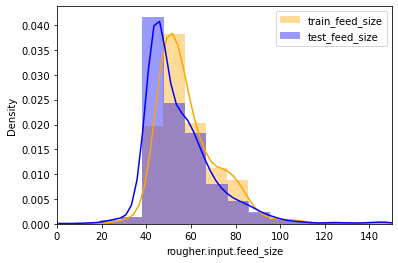

In [16]:
# Очень интересно, но ничего непонятно, посмотрим лучше на графиках
sns.distplot(train['rougher.input.feed_size'], color = 'orange', label='train_feed_size').set_xlim(0,150)
sns.distplot(test['rougher.input.feed_size'], color = 'blue', label='test_feed_size')
plt.legend()
plt.show()

Не сильно отличаются размеры гранул в обучающей и тестовой выборках как и их распределения, они весьма схожи.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Есть ли аномальные значения в суммарном распределении или нет?

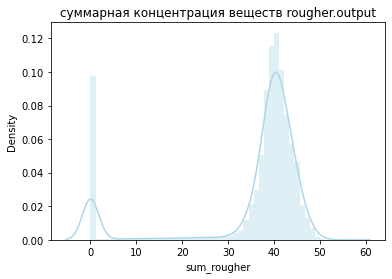

In [17]:
full['sum_rougher'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb']
sns.distplot(full['sum_rougher'], color = 'lightblue').set_title('суммарная концентрация веществ rougher.output')
plt.show()

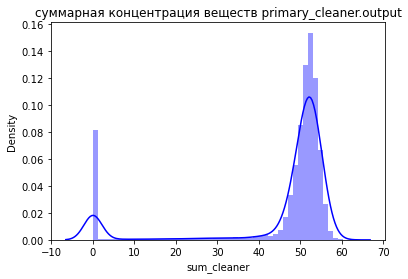

In [18]:
full['sum_cleaner'] = full['primary_cleaner.output.concentrate_au'] + full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb']
sns.distplot(full['sum_cleaner'], color = 'blue').set_title('суммарная концентрация веществ primary_cleaner.output')
plt.show()

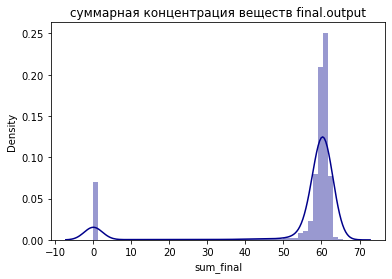

In [19]:
full['sum_final'] = full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] + full['final.output.concentrate_pb']
sns.distplot(full['sum_final'], color = 'darkblue').set_title('суммарная концентрация веществ final.output')
plt.show()

Выглядит все логично, распределение близко к нормальному, но мы видим явные аномалии на отметке 0. При обучении модели такие значения нам явно не помогут, но и просто так взяться они тоже не могли, на всякий случай передадим данную информацию заказчику, возможно стоит проверить данные или как минимум датчики их фиксирующие.

В свою же очередь дропнем данные значения из нашего датасета.

In [20]:
# Сохраним размер выборок до дропа, чтобы отсделить сколько именно мы дропнем
before_test = test.shape
before_train = train.shape

In [21]:
def delete_zeros(column:pd.DataFrame.columns):
    """
    Функция на вход получает признак
    В процессе работа функция избавляется от нулевых значений и перезаписывает индексы
    """
    sum_zeros = full[column] == 0
    a = train.index.intersection(full[sum_zeros].index)
    train.drop(a, axis=0, inplace=True)

    b = test.index.intersection(full[sum_zeros].index)
    test.drop(b, axis=0, inplace=True)

In [22]:
delete_zeros('sum_final')
delete_zeros('sum_cleaner')
delete_zeros('sum_rougher')

In [23]:
print(f'Мы дропнули {(before_train[0] - train.shape[0])/100} % нашего тренировочного датасета')

Мы дропнули 4.16 % нашего тренировочного датасета


In [24]:
print(f'Мы дропнули {(before_test[0] - test.shape[0])/100} % нашего тестового датасета')

Мы дропнули 5.8 % нашего тестового датасета


# 3. Модель

In [25]:
def smape_final(target_rougher, predict_rougher, target_final, predict_final):
    """
    Функция получает на вход целевые параметры и предсказания моделей
    
    Функция возвращает итоговую sMAPE
    
    """
    smape_rougher = 100/len(target_rougher) * np.sum(2 * np.abs(predict_rougher - target_rougher) / 
                                                     (np.abs(target_rougher) + np.abs(predict_rougher)))
    smape_final = 100/len(target_final) * np.sum(2 * np.abs(predict_final - target_final) / 
                                                 (np.abs(target_final) + np.abs(predict_final)))
    return 0.25*(smape_rougher) + 0.75*(smape_final)

Теперь разобьем и подготовим наши выборки для моделей:

In [26]:
test['rougher.output.recovery'] = full['rougher.output.recovery']
test['final.output.recovery'] = full['final.output.recovery']

In [27]:
features_train_1 = train.drop(set(train.columns)-set(test.columns), axis=1).filter(regex='^rougher',axis=1)

In [28]:
features_train_1 = features_train_1.drop(['rougher.output.recovery'], axis=1)

In [29]:
target_train_1 = train['rougher.output.recovery']

In [30]:
features_train_2 = train.drop(set(train.columns)-set(test.columns), axis=1)
features_train_2 = features_train_2.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [31]:
target_train_2 = train['final.output.recovery']

In [32]:
features_test_1 = test.filter(regex='^rougher',axis=1).drop(['rougher.output.recovery'], axis=1)

In [33]:
target_test_1 = test['rougher.output.recovery']

In [34]:
features_test_2 = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [35]:
target_test_2 = test['final.output.recovery']

Перейдем к обучению моделей:

**Решающее дерево**

In [36]:
for depth in range(1, 6):
    model = DecisionTreeRegressor(random_state=state, max_depth = depth)
    y_pred_1 = cross_val_predict(model, features_train_1, target_train_1, cv=5)
    y_pred_2 = cross_val_predict(model, features_train_2, target_train_2, cv=5)
    print('depth',depth)
    print('Итоговое sMAPE:',smape_final(target_train_1, y_pred_1, target_train_2, y_pred_2))
print()

depth 1
Итоговое sMAPE: 8.791566616623088
depth 2
Итоговое sMAPE: 8.843338941205154
depth 3
Итоговое sMAPE: 8.65983442449002
depth 4
Итоговое sMAPE: 8.567660898319623
depth 5
Итоговое sMAPE: 8.856063070571846



**Случайный лес**

In [37]:
for depth in range(5, 8):
    print('depth',depth)
    for num in range(27, 30):
        model_1 = RandomForestRegressor(random_state=state, max_depth=depth, n_estimators = num)
        y_pred_1 = cross_val_predict(model_1, features_train_1, target_train_1, cv=5)
        y_pred_2 = cross_val_predict(model_1, features_train_2, target_train_2, cv=5)
        print('num',num)
        print('Итоговое sMAPE:',smape_final(target_train_1, y_pred_1, target_train_2, y_pred_2))
    print()
    
print()

depth 5
num 27
Итоговое sMAPE: 7.99466279112316
num 28
Итоговое sMAPE: 8.002095089710222
num 29
Итоговое sMAPE: 7.998351844056146

depth 6
num 27
Итоговое sMAPE: 8.066975297609444
num 28
Итоговое sMAPE: 8.085699315119873
num 29
Итоговое sMAPE: 8.077817230594938

depth 7
num 27
Итоговое sMAPE: 8.286791177693406
num 28
Итоговое sMAPE: 8.3038670391675
num 29
Итоговое sMAPE: 8.296015498683534




**Линейная регрессия**

In [38]:
model_2 = LinearRegression()
y_pred_1 = cross_val_predict(model_2, features_train_1, target_train_1, cv=5)
y_pred_2 = cross_val_predict(model_2, features_train_2, target_train_2, cv=5)
print('Итоговое sMAPE:',smape_final(target_train_1, y_pred_1, target_train_2, y_pred_2))

Итоговое sMAPE: 9.331622719026056


**Градиентный бустинг**

In [39]:
model_3 = GradientBoostingRegressor(max_depth=1, random_state=state, loss='ls')
y_pred_1 = cross_val_predict(model_3, features_train_1, target_train_1, cv=5)
y_pred_2 = cross_val_predict(model_3, features_train_2, target_train_2, cv=5)
print('Итоговое sMAPE:',smape_final(target_train_1, y_pred_1, target_train_2, y_pred_2))

Итоговое sMAPE: 7.987447359760399


Градиентый бустинг победил, ничего удивительного... Из интересногом можно отметить, что линейная регрессия показала наихудший результат с итоговым sMAPE 9.33, а градиентный бустинг выиграл у случайного леса всего на 0.01.

Проверим нашу модель на тестовой выборке:

**Тестовая выборка**

In [40]:
model_test_1 = GradientBoostingRegressor(max_depth=1, random_state=state, loss='ls')
model_test_2 = GradientBoostingRegressor(max_depth=1, random_state=state, loss='ls')
model_test_1.fit(features_train_1, target_train_1)
model_test_2.fit(features_train_2, target_train_2)
y_pred_1 = pd.Series(model_test_1.predict(features_test_1))
y_pred_2 = pd.Series(model_test_2.predict(features_test_2))

In [41]:
target_test_1 = target_test_1.reset_index(drop=True)
target_test_2 = target_test_2.reset_index(drop=True)

In [42]:
smape_final(target_test_1, y_pred_1, target_test_2, y_pred_2)

6.911208237384366

На тестовой выборке мы получили результат даже лучше чем на обучающей.

Проверим адекватность нашей модели:

In [43]:
dummy_regr_1 = DummyRegressor(strategy="mean")
dummy_regr_2 = DummyRegressor(strategy="mean")
dummy_regr_1.fit(features_train_1, target_train_1)
dummy_regr_2.fit(features_train_2, target_train_2)
y_pred_1 = dummy_regr_1.predict(features_test_1)
y_pred_2 = dummy_regr_2.predict(features_test_2)

In [44]:
smape_final(target_test_1, y_pred_1, target_test_2, y_pred_2)

8.09304838759481

Наша модель уж явно лучше "дефолтной", можем считать ее адекватной.

# Общий вывод

1. Изучили предоставленные данные и убедились в корректности рассчетов эффективности обогащения;
2. Выполнили предобработку данных, удалили полные дубликаты, а также избавились от нулевых значений, при этом выделив отдельно процентное содержание пропусков относительно всего датасета;
3. Проанализировали данные и увидели как меняется концентрация металлов на разных этапах. Рост золота и падение других;
4. Убедились, что распределения размеров гранул не сильно отличаются друг от друга;
5. Исследовали концентрацию веществ на всех стадиях;
6. Выбрали модель, показывающую наименьшее значения sMAPE. В нашем случае это оказался градиентный бустинг.